# 1. COUNTING WORDS

Get the name of the file and open it.
If you are running on google colab, make sure you upload `examples/Python/words.txt` to the directory `content/` (the default search space for a Jupyter notebook on colab).

In [2]:
name = input('Enter file (default is words.txt):')
try:
    handle = open(name, 'r')
except:
    handle = open("words.txt", 'r')
    
# Count word frequency
counts = dict()
for line in handle:
    words = line.split()
    for word in words:
        counts[word] = counts.get(word,0) + 1 

# Find the most common word
# None: defines a null value, or no value at all
# - It is not the same as 0, False, or an empty string
# - It is a data type of its own (NoneType)
# - Only None can be None
bigcount = None
bigword = None
for word,count in counts.items():
    if bigcount is None or count > bigcount:
        bigword = word
        bigcount = count

# All done
print("The most common word is '{0}'. It appears {2} times in '{1}'.".format(bigword, handle.name, bigcount))

Enter file (default is words.txt):
The most common word is 'in'. It appears 3 times in 'words.txt'.


# 2. MOTION OF A BODY UNDER GRAVITY

We want to simulate the motion of a body under gravity. We also want to plot the trajectory to check our results. To do so, we will use `matplotlib`, a Python library to create static, animated, and interactive visualizations.



**Important:** 
- In the following you will see the magic commands `%matplotlib notebook` and `%matplotlib inline`: this kind of command is only needed in Jupyter and should not be placed in a Python program.
- It is needed **only once** in the notebook before plotting. Here, we have it once per cell to make each cell standalone.  [The same is true about all the `import`'s you will find.]
- If `%matplotlib notebook` does not seem to work as expected on Google Colab, try using `%matplotlib inline` (but do try `%matplotlib notebook` first on your personal machine).

We will use the NumPy function `arange()`:
```python
arange([start,] stop[, step,])
```
It returns evenly spaced values within a given interval.

We will learn more about NumPy in future lectures.

For convenience this example is also reported in `examples/Python/gravity1.py`.

Insert dt > 0 in sec (press return for 0.01 sec): 
Insert angle theta in (0,90) degrees (press return for 23.0 degrees): 
Insert initial height h in m: (press return for h = 5.0 m): 
Insert v_0 > 0 in m/s (press return for 10.0 m/s): 
v0_x: 9.205 m/s 	 v0_y: 3.907 m/s
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
total steps:	 149 
last x:		 13.62
last y:		 0.050


(-0.01, 6.356816965352806)

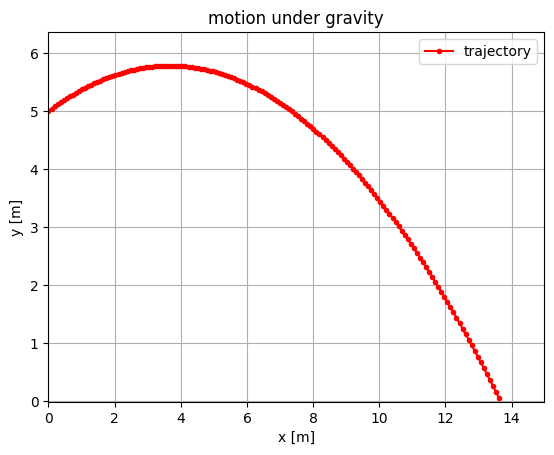

In [6]:
# ONLY for Jupyter notebook
#%matplotlib notebook
%matplotlib inline

# Import modules
import matplotlib.pyplot as plt
import math
import numpy as np

# Gravity!
g = 9.8   # m/s^2

# Function to test values provided for initial conditions or integration settings
# The 4 parameters that the user may want to customize are:
# 1) the time step (dt)
# 2) the angle at which the bullet is shot (theta)
# 3) the height from which the bullet is shot (h)
# 4) the speed at which the bullet is shot (v0)
def test_val(var, val):
    test = False
    # Accept integration steps and initial velocities only if > 0
    if var in ['dt', 'v0']:
        test = val>0
    # Accept initial height >= 0
    elif var=='h':
        test = val>=0
    # Assuming that val can only be 'theta' at this point
    # allow only 0 < theta < 90 [degrees]
    else:
        test = (val>0 and val<90)

    return test
        

# Function to handle reading in initial conditions and integration settings
def set_param(var):
    # Dictionary of default values
    defaults = {
        'dt':     0.01, # [s] Default value of the time step
        'theta': 23.,  # [deg] Default value of the angle at which the bullet is shot
        'h':      5.,  # [m] Default value of the height from which the bullet is shot
        'v0':     10., # [m/s] Default value of the speed at which the bullet is shot
    }
    # Dictionary of info messages to the user
    msgs = {
        'dt': "Insert dt > 0 in sec (press return for {0} sec): ".format(defaults['dt']),
        'theta': "Insert angle theta in (0,90) degrees (press return for {0} degrees): ".format(defaults['theta']),
        'h': "Insert initial height h in m: (press return for h = {0} m): ".format(defaults['h']),
        'v0': "Insert v_0 > 0 in m/s (press return for {0} m/s): ".format(defaults['v0'])
    }
    # Start by reading a value and continue until happy with value provided
    while True:
        val_in = input(msgs[var])
        # Allow default value
        if val_in=="":
            val_out = defaults[var]
            break
        # Convert to float...
        try:
            val_out = float(val_in)
        except:
            val_out = -1
        # ...and test value
        if test_val(var, val_out):
            break

    # Convert theta from degrees to radians
    if var=='theta':
        val_out = math.radians(val_out)
    
    return val_out


# Offer the user the chance to customize values of dt, theta, h, v0
dt = set_param('dt')
theta = set_param('theta')
h = set_param('h')
v0 = set_param('v0')

# Compute initial velocity components
v0x = v0*math.cos(theta)
v0y = v0*math.sin(theta)
print("v0_x: %.3f m/s \t v0_y: %.3f m/s"%(v0x,v0y))

# Initial position coordinates
x0 = 0
y0 = h

# "Evolution" functions
def x(t):
    return x0 + v0x*t

def y(t):
    return y0 + v0y*t - 0.5*g*t*t

# Generate list of times for sampling
times = np.arange(0., 1000., dt).tolist() 

# Print first 10 elements
print(times[:10])

# Compute x(t_i)
xi = [x(t) for t in times if y(t)>=0.]

# Compute y(t_i)
yi = [y(t) for t in times if y(t)>=0.]

print( "total steps:\t %-4d"%len(xi))
print( "last x:\t\t %.2f"%xi[-1])
print( "last y:\t\t %.3f"%yi[-1])

# Plot results...
plt.plot(xi, yi, label='trajectory', color='red', marker='.')
plt.legend()

# ...and make them look good
plt.title('motion under gravity')
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.grid(True)
plt.xlim(-0.01, max(xi)*1.1)
plt.ylim(-0.01,max(yi)*1.10)

# Only for script
#plt.show()
# or use this to save your plot
#plt.savefig("./gravity.png")

# 3. PLOTTING A HISTOGRAM

All you need are two collections (lists in this case)
- values on the *x* axis
- the number of counts for each value of *x*

We use the [matplotlib.pyplot.bar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) function for this purpose

Our data

In [7]:
import random as r

grades = []

for i in range(50):
    grades.append(r.randrange(10,31))

vals = set(grades)

data = {}
for v in vals:
    data[v] = grades.count(v)
    
    

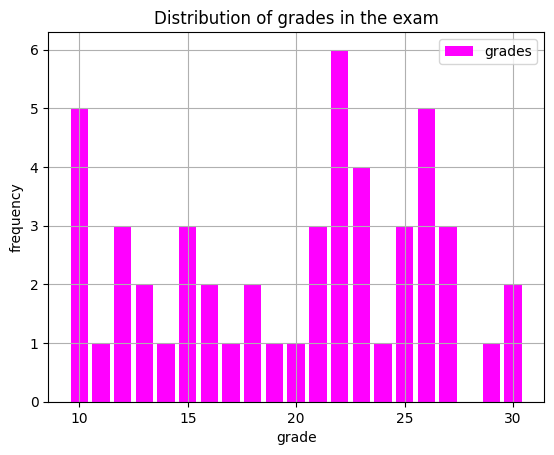

In [8]:
# ONLY for Jupyter notebook
#%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt

plt.bar(list(data.keys()), list(data.values()), color='magenta', label="grades")
plt.title("Distribution of grades in the exam")
plt.xlabel('grade')
plt.ylabel('frequency')
plt.grid()
plt.legend()
#plt.show()


You could also create a histogram using  [matplotlib.pyplot.hist](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html)

Note the strange-looking syntax since `hist` is returning more than one value! This is a feature of functions in Python which we will discuss shortly

[5. 1. 3. 2. 1. 3. 2. 1. 2. 1. 1. 3. 6. 4. 1. 3. 5. 3. 0. 3.]
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.
 28. 29. 30.]


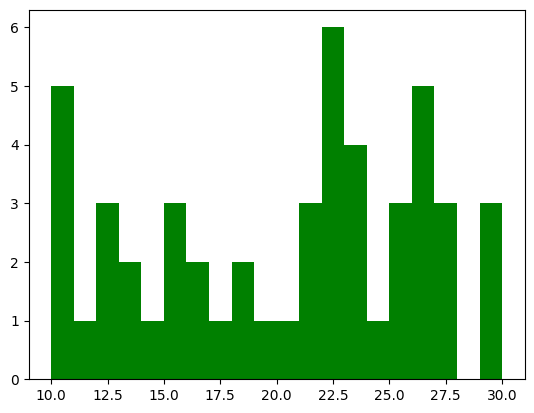

In [13]:
# ONLY for Jupyter notebook
#%matplotlib notebook
%matplotlib inline

n, bins, patches = plt.hist(grades, facecolor='green', bins=len(set(grades)))
print(n)
print(bins)


# READY FOR `examples/Python/3-MoreFuncs.ipynb`!